In [13]:
import sys
import os
import pandas as pd
#import ssbio


from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP

import statistics as stat
import numpy as np
# from sphere_fibo import sphere_fibo

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
if len(sys.argv) !=2:
	print ("Il faut exactement un argument le nom du fichier pdb")
	exit()

if os.path.exists(sys.argv[1])==False:
	print("Le fichier pdb n'a pas été trouvé")
	exit()

In [15]:
# fichier_pdb=sys.argv[1] ### ../data/1py6.pdb
fichier_pdb='1py6.pdb'

In [16]:
##Constantes

#d'après l'article aa hydrophobes
HYDROPHOBE=["FHE", "GLY", "ILE", "LEU," "MET", "VAL", "TRP","TYR"]
SEUIL_ACC=0.3
NB_POINTS_SPHERE=256
LARGEUR_ESPACE=15 



def recup_coord_carbones_alpha(fichier_pdb):
	"""
		Recupération des coordonnées des carbones alpha à partir du fichier pdb donné en entrée
		et renvoie d'un dataframe
	"""
	data_pdb=[]
	file=open(fichier_pdb,"r")
	
	for ligne in file:
		if ligne.startswith("ATOM"):
			if str.strip(ligne[12:15])=="CA" and (str.strip(ligne[16:17])=="" or str.strip(ligne[16:17])=="A"):
				data_pdb.append([ligne[17:20],float(str.strip(ligne[30:37])),float(str.strip(ligne[38:46])),float(str.strip(ligne[46:53]))])
	file.close()

	data=pd.DataFrame(data=data_pdb,columns=["type_aa","x","y","z"])

	return (data)

data=recup_coord_carbones_alpha(fichier_pdb) 
print(data)

data["hydrophobe"]=data.type_aa.isin(HYDROPHOBE)
print(data["type_aa"])


from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP


def recup_acc_solvant(fichier_pdb):
	"""
	entrée le fichier pdb
	sortie une liste de l'accesibilité relative (en 0 et 1) des résidues
	utilise Biopython et le programme dssp

	"""
	acces_solvant=[]
	p = PDBParser()
	structure = p.get_structure("structure",fichier_pdb)
	model = structure[0]
	dssp = DSSP(model,fichier_pdb)

	for i in range(len(list(dssp))):
		acces_solvant.append((list(dssp)[i][3]))
	return acces_solvant


acces_solvant=recup_acc_solvant(fichier_pdb)
data["acces_solvant"]=acces_solvant 

print(data)

#on garde que les résidues avec plus d'un certain seuil d'acessibilité au solvant pour la sphère
data=data.loc[data['acces_solvant'] > SEUIL_ACC]
print(data)

import numpy
import statistics as stat 

def recup_centre_gravite(data_frame):
	return(stat.mean(data_frame.x),stat.mean(data_frame.y),stat.mean(data_frame.z))

centre_gravite=recup_centre_gravite(data)

#######
#######



class Sphere:
	def __init__(self,nb_points,centre_gravite):
		self.nb_points = nb_points
		self.coord_points= self.sphere_fibo(nb_points)
		self.centre_sphere=centre_gravite
		self.coord_points+=self.centre_sphere

	def sphere_fibo(self,nb_points):
		"""
		Entrée le nombre de points de la spère
		créé des points uniformement repartis sur la sphère de centre (0,0,0)
		Renvoie un numpy.array des points

		"""
 
		golden_angle = numpy.pi * (3 - numpy.sqrt(5))
		theta = golden_angle * numpy.arange(nb_points)
		z = numpy.linspace(1 - 1.0 / nb_points, 1.0 / nb_points - 1, nb_points)
		radius = numpy.sqrt(1 - z * z)
 
		points = numpy.zeros((nb_points, 3))
		points[:,0] = radius * numpy.cos(theta)
		points[:,1] = radius * numpy.sin(theta)
		points[:,2] = z
  
		return points

	def get_points_sphere(self):
		return self.coord_points
	def get_centre(self):
		return self.centre_sphere

notre_sphere=Sphere(256,centre_gravite)

print(notre_sphere.get_centre())
print(notre_sphere.get_points_sphere())

    type_aa      x       y      z
0       THR  11.14  -9.833  19.57
1       GLY  11.61 -12.203  16.63
2       ARG   8.00 -12.293  15.35
3       PRO   7.19 -15.077  12.80
4       GLU   6.53 -12.491  10.09
..      ...    ...     ...    ...
222     ARG   9.04   3.011 -24.88
223     ALA   5.67   4.482 -23.88
224     ILE   7.35   6.666 -21.23
225     PHE   9.06   8.810 -23.85
226     GLY   7.83  12.292 -24.70

[227 rows x 4 columns]
0      THR
1      GLY
2      ARG
3      PRO
4      GLU
      ... 
222    ARG
223    ALA
224    ILE
225    PHE
226    GLY
Name: type_aa, Length: 227, dtype: object


/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 1779.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 1779.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 1780.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/

/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 2150.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 2150.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 2151.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 2151.
Exception ignored.
Some atoms or residues may be mi

/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 2586.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 2586.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing occupancy at line 2587.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/aude/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:392: PDBConstructionWarning: PDBConstructionException: Invalid or missing B factor at line 2587.
Exception ignored.
Some atoms or residues may be mi

FileNotFoundError: [Errno 2] No such file or directory: 'mkdssp'

In [ ]:
points_sphere_coord=notre_sphere.get_points_sphere()
centre_sphere_coord=notre_sphere.get_centre()


In [46]:
centre_sphere_coord=[-0.3737864077669903,-0.07359223300970866,-2.4185436893203884]

points_sphere_coord=[[-2.85484419e-01,-7.35922330e-02,-1.42244994e+00]
,[-4.86341295e-01,2.95172636e-02,-1.43026244e+00]
,[-3.56591959e-01,-2.69514108e-01,-1.43807494e+00]
,[-2.32476801e-01,1.10721126e-01,-1.44588744e+00]
,[-6.32592901e-01,-1.19371457e-01,-1.45369994e+00]
,[-1.29110194e-01,-2.29235212e-01,-1.46151244e+00]
,[-4.55462297e-01,2.30238005e-01,-1.46932494e+00]
,[-5.29238720e-01,-3.72906200e-01,-1.47713744e+00]
,[-3.71963655e-02,4.93299106e-02,-1.48494994e+00]
,[-7.23244139e-01,7.06588382e-02,-1.49276244e+00]
,[-2.05666744e-01,-4.32854189e-01,-1.50057494e+00]
,[-2.49803538e-01,3.21684693e-01,-1.50838744e+00]
,[-7.46707251e-01,-2.89707484e-01,-1.51619994e+00]
,[6.27929536e-02,-1.69572981e-01,-1.52401244e+00]
,[-6.39674073e-01,3.04605610e-01,-1.53182494e+00]
,[-4.35085307e-01,-5.46631606e-01,-1.53963744e+00]
,[1.74553468e-03,2.42906486e-01,-1.54744994e+00]
,[-8.78078576e-01,-5.27381686e-02,-1.55526244e+00]
,[-6.71595059e-03,-4.38876365e-01,-1.56307494e+00]
,[-3.98293087e-01,4.56387299e-01,-1.57088744e+00]
,[-7.21581412e-01,-4.90366885e-01,-1.57869994e+00]
,[1.75988300e-01,3.79176383e-04,-1.58651244e+00]
,[-8.38615119e-01,2.49823477e-01,-1.59432494e+00]
,[-2.47040747e-01,-6.36989404e-01,-1.60213744e+00]
,[-8.12614101e-02,4.36902893e-01,-1.60994994e+00]
,[-9.44408337e-01,-2.55636192e-01,-1.61776244e+00]
,[1.79296515e-01,-3.29130572e-01,-1.62557494e+00]
,[-6.12873155e-01,4.97693326e-01,-1.63338744e+00]
,[-5.86698636e-01,-6.65542465e-01,-1.64119994e+00]
,[1.91503673e-01,2.23508390e-01,-1.64901244e+00]
,[-1.00029384e+00,9.15531149e-02,-1.65682494e+00]
,[-1.84657414e-02,-6.26197508e-01,-1.66463744e+00]
,[-2.61008823e-01,5.82628258e-01,-1.67244994e+00]
,[-9.07056198e-01,-4.86586333e-01,-1.68026244e+00]
,[3.06827914e-01,-1.29979738e-01,-1.68807494e+00]
,[-8.43171212e-01,4.33798987e-01,-1.69588744e+00]
,[-3.70375106e-01,-7.72868127e-01,-1.70369994e+00]
,[1.01358893e-01,4.50186112e-01,-1.71151244e+00]
,[-1.08564347e+00,-1.39566985e-01,-1.71932494e+00]
,[2.01700858e-01,-5.10366550e-01,-1.72713744e+00]
,[-5.04419852e-01,6.44484705e-01,-1.73494994e+00]
,[-7.66371180e-01,-6.97448706e-01,-1.74276244e+00]
,[3.43937431e-01,1.23106115e-01,-1.75057494e+00]
,[-1.04205497e+00,2.69352159e-01,-1.75838744e+00]
,[-1.10319544e-01,-7.84248861e-01,-1.76619994e+00]
,[-8.55079014e-02,6.34556742e-01,-1.77401244e+00]
,[-1.07059194e+00,-4.03821377e-01,-1.78182494e+00]
,[3.69184491e-01,-3.02658102e-01,-1.78963744e+00]
,[-7.70060991e-01,6.02580089e-01,-1.79744994e+00]
,[-5.39620363e-01,-8.45852039e-01,-1.80526244e+00]
,[2.75043516e-01,3.87306153e-01,-1.81307494e+00]
,[-1.16938400e+00,2.55615629e-02,-1.82088744e+00]
,[1.49621729e-01,-6.88513588e-01,-1.82869994e+00]
,[-3.44152002e-01,7.39034019e-01,-1.83651244e+00]
,[-9.48444484e-01,-6.56722513e-01,-1.84432494e+00]
,[4.49264604e-01,-3.15090814e-02,-1.85213744e+00]
,[-1.01320287e+00,4.54725488e-01,-1.85994994e+00]
,[-2.58454427e-01,-9.00235172e-01,-1.86776244e+00]
,[1.02454829e-01,6.18057404e-01,-1.87557494e+00]
,[-1.19702735e+00,-2.63018050e-01,-1.88338744e+00]
,[3.65463520e-01,-4.92421689e-01,-1.89119994e+00]
,[-6.37452065e-01,7.39160928e-01,-1.89901244e+00]
,[-7.30325533e-01,-8.55272330e-01,-1.90682494e+00]
,[4.21371332e-01,2.63754265e-01,-1.91463744e+00]
,[-1.19223707e+00,2.16286197e-01,-1.92244994e+00]
,[3.59777167e-02,-8.44095175e-01,-1.93026244e+00]
,[-1.54384346e-01,7.75532325e-01,-1.93807494e+00]
,[-1.11269304e+00,-5.53814110e-01,-1.94588744e+00]
,[4.99534890e-01,-2.19298095e-01,-1.95369994e+00]
,[-9.21823747e-01,6.26962912e-01,-1.96151244e+00]
,[-4.43207500e-01,-9.64312855e-01,-1.96932494e+00]
,[2.81915036e-01,5.38956654e-01,-1.97713744e+00]
,[-1.27485198e+00,-8.23838421e-02,-1.98494994e+00]
,[2.99335614e-01,-6.78255008e-01,-1.99276244e+00]
,[-4.62034935e-01,8.30572753e-01,-2.00057494e+00]
,[-9.21604052e-01,-8.02747689e-01,-2.00838744e+00]
,[5.26108948e-01,9.46571506e-02,-2.01619994e+00]
,[-1.15387328e+00,4.12010038e-01,-2.02401244e+00]
,[-1.25702417e-01,-9.61794317e-01,-2.03182494e+00]
,[4.47200844e-02,7.51806077e-01,-2.03963744e+00]
,[-1.24288648e+00,-4.00631216e-01,-2.04744994e+00]
,[4.90834730e-01,-4.20661422e-01,-2.05526244e+00]
,[-7.78190985e-01,7.69081432e-01,-2.06307494e+00]
,[-6.45659654e-01,-9.70932787e-01,-2.07088744e+00]
,[4.35289563e-01,4.05889048e-01,-2.07869994e+00]
,[-1.29698599e+00,1.19947888e-01,-2.08651244e+00]
,[1.77800102e-01,-8.42119737e-01,-2.09432494e+00]
,[-2.61062360e-01,8.68310296e-01,-2.10213744e+00]
,[-1.09510064e+00,-6.93653263e-01,-2.10994994e+00]
,[5.79431443e-01,-1.03698183e-01,-2.11776244e+00]
,[-1.05806159e+00,5.94192754e-01,-2.12557494e+00]
,[-3.20173510e-01,-1.03057268e+00,-2.13338744e+00]
,[2.34561929e-01,6.70042587e-01,-2.14119994e+00]
,[-1.32687970e+00,-2.11309618e-01,-2.14901244e+00]
,[4.23800524e-01,-6.17061076e-01,-2.15682494e+00]
,[-5.95271623e-01,8.67936267e-01,-2.16463744e+00]
,[-8.47449254e-01,-9.19217075e-01,-2.17244994e+00]
,[5.48541243e-01,2.30601374e-01,-2.18026244e+00]
,[-1.26107942e+00,3.25901521e-01,-2.18807494e+00]
,[1.13396012e-02,-9.69193791e-01,-2.19588744e+00]
,[-5.22195171e-02,8.48599123e-01,-2.20369994e+00]
,[-1.23531575e+00,-5.37170979e-01,-2.21151244e+00]
,[5.76192599e-01,-3.14116197e-01,-2.21932494e+00]
,[-9.12653952e-01,7.46764651e-01,-2.22713744e+00]
,[-5.30823604e-01,-1.04396982e+00,-2.23494994e+00]
,[3.98608250e-01,5.36741646e-01,-2.24276244e+00]
,[-1.35696025e+00,-1.78906266e-03,-2.25057494e+00]
,[3.03564669e-01,-7.91607201e-01,-2.25838744e+00]
,[-3.88249956e-01,9.14629497e-01,-2.26619994e+00]
,[-1.03143501e+00,-8.12922357e-01,-2.27401244e+00]
,[6.11657410e-01,2.74447223e-02,-2.28182494e+00]
,[-1.16951153e+00,5.18188731e-01,-2.28963744e+00]
,[-1.86600153e-01,-1.04842433e+00,-2.29744994e+00]
,[1.47161257e-01,7.72446116e-01,-2.30526244e+00]
,[-1.33023452e+00,-3.45774786e-01,-2.31307494e+00]
,[5.16038462e-01,-5.19321925e-01,-2.32088744e+00]
,[-7.29091941e-01,8.56830294e-01,-2.32869994e+00]
,[-7.40534534e-01,-1.00028889e+00,-2.33651244e+00]
,[5.23167500e-01,3.62257816e-01,-2.34432494e+00]
,[-1.33011258e+00,2.11066268e-01,-2.35213744e+00]
,[1.39346172e-01,-9.29899262e-01,-2.35994994e+00]
,[-1.73641565e-01,9.04857207e-01,-2.36776244e+00]
,[-1.18259688e+00,-6.60089719e-01,-2.37557494e+00]
,[6.19082045e-01,-1.87505678e-01,-2.38338744e+00]
,[-1.02910941e+00,6.81261451e-01,-2.39119994e+00]
,[-4.00472848e-01,-1.07304527e+00,-2.39901244e+00]
,[3.21097007e-01,6.45434686e-01,-2.40682494e+00]
,[-1.37192844e+00,-1.34397015e-01,-2.41463744e+00]
,[4.03285504e-01,-7.02991935e-01,-2.42244994e+00]
,[-5.21612638e-01,9.15351687e-01,-2.43026244e+00]
,[-9.32737713e-01,-9.02562660e-01,-2.43807494e+00]
,[5.98150283e-01,1.60055769e-01,-2.44588744e+00]
,[-1.24807555e+00,4.10538475e-01,-2.45369994e+00]
,[-5.62354752e-02,-1.02085940e+00,-2.46151244e+00]
,[3.17823165e-02,8.39060644e-01,-2.46932494e+00]
,[-1.28893607e+00,-4.72425374e-01,-2.47713744e+00]
,[5.69961643e-01,-3.97520970e-01,-2.48494994e+00]
,[-8.50602830e-01,8.02271727e-01,-2.49276244e+00]
,[-6.13687051e-01,-1.04091770e+00,-2.50057494e+00]
,[4.55966395e-01,4.77260186e-01,-2.50838744e+00]
,[-1.35698898e+00,8.06023212e-02,-2.51619994e+00]
,[2.46542103e-01,-8.50810916e-01,-2.52401244e+00]
,[-3.06252102e-01,9.17672856e-01,-2.53182494e+00]
,[-1.09250656e+00,-7.58265620e-01,-2.53963744e+00]
,[6.17681589e-01,-5.42430776e-02,-2.54744994e+00]
,[-1.11714863e+00,5.81175350e-01,-2.55526244e+00]
,[-2.68061951e-01,-1.05742812e+00,-2.56307494e+00]
,[2.12132059e-01,7.22329203e-01,-2.57088744e+00]
,[-1.34224909e+00,-2.64458716e-01,-2.57869994e+00]
,[4.68146552e-01,-5.86364493e-01,-2.58651244e+00]
,[-6.47849409e-01,8.71918435e-01,-2.59432494e+00]
,[-8.09751259e-01,-9.54630248e-01,-2.60213744e+00]
,[5.41422568e-01,2.81028944e-01,-2.60994994e+00]
,[-1.28672673e+00,2.82570455e-01,-2.61776244e+00]
,[5.80874881e-02,-9.51443587e-01,-2.62557494e+00]
,[-9.97297867e-02,8.63816499e-01,-2.63338744e+00]
,[-1.20757981e+00,-5.78778097e-01,-2.64119994e+00]
,[5.80492866e-01,-2.63947748e-01,-2.64901244e+00]
,[-9.47745808e-01,7.09856969e-01,-2.65682494e+00]
,[-4.79566108e-01,-1.03704878e+00,-2.66463744e+00]
,[3.53501010e-01,5.64047656e-01,-2.67244994e+00]
,[-1.33870092e+00,-5.25379266e-02,-2.68026244e+00]
,[3.21934423e-01,-7.39419111e-01,-2.68807494e+00]
,[-4.36883848e-01,8.85104360e-01,-2.69588744e+00]
,[-9.73418105e-01,-8.21340680e-01,-2.70369994e+00]
,[5.71128786e-01,7.23686813e-02,-2.71151244e+00]
,[-1.16711221e+00,4.55713741e-01,-2.71932494e+00]
,[-1.46949705e-01,-9.97342745e-01,-2.72713744e+00]
,[8.17016983e-02,7.58524147e-01,-2.73494994e+00]
,[-1.26923517e+00,-3.78639318e-01,-2.74276244e+00]
,[4.90060726e-01,-4.52437028e-01,-2.75057494e+00]
,[-7.53728718e-01,7.86727514e-01,-2.75838744e+00]
,[-6.73851181e-01,-9.61903138e-01,-2.76619994e+00]
,[4.44947485e-01,3.77314388e-01,-2.77401244e+00]
,[-1.27915467e+00,1.46260094e-01,-2.78182494e+00]
,[1.43577552e-01,-8.44710876e-01,-2.78963744e+00]
,[-2.34865743e-01,8.41356455e-01,-2.79744994e+00]
,[-1.09174078e+00,-6.52375553e-01,-2.80526244e+00]
,[5.43264741e-01,-1.31577433e-01,-2.81307494e+00]
,[-1.00847008e+00,5.86177534e-01,-2.82088744e+00]
,[-3.51543209e-01,-9.85336216e-01,-2.82869994e+00]
,[2.23350386e-01,6.11046192e-01,-2.83651244e+00]
,[-1.27295058e+00,-1.74657148e-01,-2.84432494e+00]
,[3.54493004e-01,-6.04257436e-01,-2.85213744e+00]
,[-5.51584615e-01,8.05923725e-01,-2.85994994e+00]
,[-8.34783120e-01,-8.38892531e-01,-2.86776244e+00]
,[4.79282416e-01,1.78193427e-01,-2.87557494e+00]
,[-1.16924585e+00,3.15206636e-01,-2.88338744e+00]
,[-5.13859731e-02,-8.93747114e-01,-2.89119994e+00]
,[-5.90277427e-02,7.44989933e-01,-2.89901244e+00]
,[-1.15495206e+00,-4.62644462e-01,-2.90682494e+00]
,[4.60775963e-01,-3.13168192e-01,-2.91463744e+00]
,[-8.24979329e-01,6.62956095e-01,-2.92244994e+00]
,[-5.37743177e-01,-9.16955796e-01,-2.93026244e+00]
,[3.13015023e-01,4.34729590e-01,-2.93807494e+00]
,[-1.21880561e+00,1.50142644e-02,-2.94588744e+00]
,[1.86204101e-01,-7.06062326e-01,-2.95369994e+00]
,[-3.59563262e-01,7.66040210e-01,-2.96151244e+00]
,[-9.47927231e-01,-6.79399405e-01,-2.96932494e+00]
,[4.53588762e-01,-1.50828257e-02,-2.97713744e+00]
,[-1.01922687e+00,4.38843686e-01,-2.98494994e+00]
,[-2.44858394e-01,-8.82078717e-01,-2.99276244e+00]
,[7.42211223e-02,6.05030547e-01,-3.00057494e+00]
,[-1.15705692e+00,-2.69988912e-01,-3.00838744e+00]
,[3.31366593e-01,-4.55123690e-01,-3.01619994e+00]
,[-6.34099153e-01,6.78501423e-01,-3.02401244e+00]
,[-6.87487136e-01,-7.98490820e-01,-3.03182494e+00]
,[3.41594865e-01,2.46520542e-01,-3.03963744e+00]
,[-1.11158351e+00,1.71626794e-01,-3.04744994e+00]
,[1.49166843e-03,-7.47206068e-01,-3.05526244e+00]
,[-1.96992373e-01,6.70264835e-01,-3.06307494e+00]
,[-1.00110903e+00,-4.98932054e-01,-3.07088744e+00]
,[3.69371854e-01,-1.82722997e-01,-3.07869994e+00]
,[-8.43670115e-01,5.03492727e-01,-3.08651244e+00]
,[-4.16711361e-01,-8.09443543e-01,-3.09432494e+00]
,[1.49732742e-01,4.34961879e-01,-3.10213744e+00]
,[-1.09594315e+00,-9.47356395e-02,-3.10994994e+00]
,[1.67271295e-01,-5.40871273e-01,-3.11776244e+00]
,[-4.56202721e-01,6.28771179e-01,-3.12557494e+00]
,[-7.82834840e-01,-6.40758693e-01,-3.13338744e+00]
,[3.03040039e-01,6.66714657e-02,-3.14119994e+00]
,[-9.60506485e-01,2.75943110e-01,-3.14901244e+00]
,[-1.79697448e-01,-7.19556838e-01,-3.15682494e+00]
,[-8.43201332e-02,5.26035478e-01,-3.16463744e+00]
,[-9.84043681e-01,-3.16926216e-01,-3.17244994e+00]
,[2.32082634e-01,-3.03172830e-01,-3.18026244e+00]
,[-6.61269926e-01,4.96648841e-01,-3.18807494e+00]
,[-5.44411644e-01,-6.79086843e-01,-3.19588744e+00]
,[1.52719840e-01,2.52476524e-01,-3.20369994e+00]
,[-9.72411806e-01,3.97576419e-02,-3.21151244e+00]
,[-1.51165272e-02,-5.53285162e-01,-3.21932494e+00]
,[-3.15283446e-01,5.11859346e-01,-3.22713744e+00]
,[-8.04273932e-01,-4.58509532e-01,-3.23494994e+00]
,[1.92443949e-01,-8.04211959e-02,-3.24276244e+00]
,[-7.78277518e-01,3.06027235e-01,-3.25057494e+00]
,[-3.32853891e-01,-6.14874973e-01,-3.25838744e+00]
,[-4.59276196e-02,3.43525852e-01,-3.26619994e+00]
,[-8.84775353e-01,-1.57636959e-01,-3.27401244e+00]
,[4.87785625e-02,-3.49607322e-01,-3.28182494e+00]
,[-4.95553588e-01,4.02189684e-01,-3.28963744e+00]
,[-5.98725453e-01,-4.94218230e-01,-3.29744994e+00]
,[6.23514722e-02,7.97492424e-02,-3.30526244e+00]
,[-7.84886987e-01,1.01935988e-01,-3.31307494e+00]
,[-1.95822692e-01,-4.66153913e-01,-3.32088744e+00]
,[-2.45045704e-01,3.20160775e-01,-3.32869994e+00]
,[-7.19348278e-01,-2.68323760e-01,-3.33651244e+00]
,[-5.55053814e-03,-1.59215953e-01,-3.34432494e+00]
,[-5.76324297e-01,2.22010733e-01,-3.35213744e+00]
,[-4.21160315e-01,-4.07523342e-01,-3.35994994e+00]
,[-1.30787326e-01,1.26245729e-01,-3.36776244e+00]
,[-6.63358019e-01,-5.81174714e-02,-3.37557494e+00]
,[-1.89738186e-01,-2.61216299e-01,-3.38338744e+00]
,[-3.81715739e-01,1.58521845e-01,-3.39119994e+00]
,[-5.01609708e-01,-2.23065422e-01,-3.39901244e+00]
,[-2.22271207e-01,-5.50634773e-02,-3.40682494e+00]
,[-4.45656374e-01,-2.22897069e-02,-3.41463744e+00]]

In [3]:
xlist=[points_sphere_coord[i][0]for i in range (len(points_sphere_coord))]
ylist=[points_sphere_coord[i][1]for i in range (len(points_sphere_coord))]
zlist=[points_sphere_coord[i][2]for i in range (len(points_sphere_coord))]


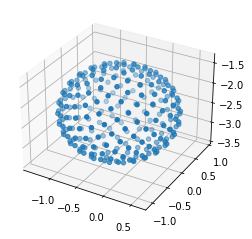

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xlist,ylist,zlist)
plt.show()

In [23]:
# class Sphere :
#     def __init__(self):
#         self.centre_x=-0.3737864077669903
#         self.centre_y=-0.07359223300970866
#         self.centre_z=-2.4185436893203884
#         self.centre_all=[self.centre_x, self.centre_y, self.centre_z]
#         self.points=points_sphere_coord
#     def print_attributes(self):
#         print(self)
#         print('x :',self.centre_x)
#         print('y :',self.centre_y)
#         print('z :',self.centre_z)
#         print('all:',self.centre_all)

In [24]:
Sphere0=Sphere()

In [30]:
Sphere0.print_attributes()
centre_sphere=Sphere0.centre_all
coord=

x : -0.3737864077669903
y : -0.07359223300970866
z : -2.4185436893203884
all: [-0.3737864077669903, -0.07359223300970866, -2.4185436893203884]


In [119]:
# class vec2d():
#     def __init__(x, y):
#         self.x = x 
#         self.y = y 
# class vec3d(vec2d)
#     def __init__(x ,y , z  ):
#         super.__init__(x ,y) 
#         self.z = 0


    
class Vecteur():

    def __init__(self, centre_sphere,coord):
 
        self.origine_x=centre_sphere[0]
        self.origine_y=centre_sphere[1]
        self.origine_z=centre_sphere[2]
        self.origine_all=centre_sphere
        
        self.pointe_x=coord[0]
        self.pointe_y=coord[1]
        self.pointe_z=coord[2]
        self.pointe_all=coord
        
    def print_attributes(self):
        print('coordonnées en x: ', self.origine_x, self.pointe_x)
        print('coordonnées en y: ', self.origine_y, self.pointe_y)
        print('coordonnées en z: ', self.origine_z, self.pointe_z)
        
class Tranche():
    def __init__(self,origine_all, pointe_all, AA_proche_coord, increment, epaisseur):
        
        self.vecteur_directeur=[pointe_all[i]-origine_all[i] for i in range(3)]
        
        self.x0=AA_proche_coord[0]
        self.y0=AA_proche_coord[1]
        self.z0=AA_proche_coord[2]
        
        self.a=self.vecteur_directeur[0]
        self.b=self.vecteur_directeur[1]
        self.c=self.vecteur_directeur[2]
        
        self.dmin=np.sqrt((self.x0-origine_all[0])**2+(self.y0-origine_all[1])**2+(self.z0-origine_all[2])**2)
#         self.dA=self.dmin+increment*epaisseur
#         self.dB=self.dmin+(increment+1)*epaisseur
        
        

    def print_attributes(self):
        print('equation plan A: {0}*x+{1}*y+{2}*z+{3}=0'.format(self.a,self.b,self.c,self.dA))
        print('equation plan B: {0}*x+{1}*y+{2}*z+{3}=0'.format(self.a,self.b,self.c,self.dB))
        print('vecteur directeur:',self.vecteur_directeur)
#         print('dA:',self.dA, 'dB:',self.dB)
    

In [120]:
V1=Vecteur(centre_sphere_coord,points_sphere_coord[0])
V1.print_attributes()

coordonnées en x:  -0.3737864077669903 -0.285484419
coordonnées en y:  -0.07359223300970866 -0.073592233
coordonnées en z:  -2.4185436893203884 -1.42244994


In [122]:
Tranche1=Tranche(V1.origine_all,V1.pointe_all, [11.14,-9.833,19.57],0,15)
Tranche1.print_attributes()

equation plan A: 0.0883019887669903*x+9.708650550166453e-12*y+0.9960937493203885*z+26.67038378020125=0
equation plan B: 0.0883019887669903*x+9.708650550166453e-12*y+0.9960937493203885*z+41.67038378020125=0
vecteur directeur: [0.0883019887669903, 9.708650550166453e-12, 0.9960937493203885]
dA: 26.67038378020125 dB: 41.67038378020125


In [146]:
def DeterminerPlanSuivant(Coord_Vect_Directeur,Dist_Plan_Precedent, d_Plan_Precedent, Coord_Centre_Sphere):
    
    a=Coord_Vect_Directeur[0]
    b=Coord_Vect_Directeur[1]
    c=Coord_Vect_Directeur[2]
    
    x0=Coord_Centre_Sphere[0]
    y0=Coord_Centre_Sphere[1]
    z0=Coord_Centre_Sphere[2]
    
    DPC=np.abs(a*x0+b*y0+c*z0+d_Plan_Precedent)/np.sqrt(a**2+b**2+c**2) #distance du plan précédent au centre de la sphère
    
    k=(DPC+Dist_Plan_Precedent)/np.sqrt(a**2+b**2+c**2)
    
    x1=k*a+x0
    y1=k*b+y0
    z1=k*c+z0
    
    d1=-(a*x1+b*y1+c*z1)
    
    return [a,b,c],d_Plan_Precedent,d1


def DistanceAuPlan(Coord_Residue,Coord_Vect_Directeur,d0,d1,epaisseur):
    
    a=Coord_Vect_Directeur[0]
    b=Coord_Vect_Directeur[1]
    c=Coord_Vect_Directeur[2]
    
    xR=Coord_Residue[0]
    yR=Coord_Residue[1]
    zR=Coord_Residue[2]
    
    DistanceA=np.abs(a*xR+b*yR+c*zR+d0)/np.sqrt(a**2+b**2+c**2)
    DistanceB=np.abs(a*xR+b*yR+c*zR+d1)/np.sqrt(a**2+b**2+c**2)
    
    return DistanceA,DistanceB

def EntreLesPlans(DistanceA,DistanceB,epaisseur):
    if DistanceA<epaisseur and DistanceB<epaisseur:
        return True
    else :
        return False

In [131]:
DeterminerPlanSuivant([1,2,3],15,12,centre_sphere_coord)

(1, 2, 3, 12, -52.57165691811397)

In [144]:
centre_sphere_coord=[-0.3737864077669903,-0.07359223300970866,-2.4185436893203884]

points_sphere_coord_list=[[-2.85484419e-01,-7.35922330e-02,-1.42244994e+00]
,[-4.86341295e-01,2.95172636e-02,-1.43026244e+00]
,[-3.56591959e-01,-2.69514108e-01,-1.43807494e+00]
,[-2.32476801e-01,1.10721126e-01,-1.44588744e+00]
,[-6.32592901e-01,-1.19371457e-01,-1.45369994e+00]
,[-1.29110194e-01,-2.29235212e-01,-1.46151244e+00]]

Coord_Vect_Directeur=[points_sphere_coord_list[0][i]-centre_sphere_coord[i] for i in range (3)]
Coord_Centre_Sphere=centre_sphere_coord.copy()
Dist_Plan_Precedent=15

d_Plan_Precedent=-(Coord_Vect_Directeur[0]*centre_sphere_coord[0]+Coord_Vect_Directeur[1]*centre_sphere_coord[1]+Coord_Vect_Directeur[2]*centre_sphere_coord[2])
# print(d_Plan_Precedent)

Coord_Vect_Directeur,d0,d1=DeterminerPlanSuivant(Coord_Vect_Directeur,Dist_Plan_Precedent, d_Plan_Precedent, Coord_Centre_Sphere)

In [152]:
EntreLesPlans(DistanceAuPlan([11.14,-9.833,19.57],Coord_Vect_Directeur,d0,d1,15)[0],DistanceAuPlan([11.14,-9.833,19.57],Coord_Vect_Directeur,d0,d1,15)[1],epaisseur=15)

False